In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import glob

# Shanghai World University Rankings


O Academic Ranking of World Universities (ARWU), também conhecido como Shanghai Ranking, foi o primeiro ranking global de univerisidades baseado em um conjunto de indicadores. Foi criado em 2003 plea Shanghai Jiao Tong University. Desde 2009 vem sendo publicado pela Shanghai Ranking Consultancy, uma consultoria focada em educação superior não vinculada a nenhuma universidade ou agência governamental. Informações a repeito desse ranking podem ser encontradas no seguintes links:

- https://en.wikipedia.org/wiki/Academic_Ranking_of_World_Universities
- https://www.shanghairanking.com/about-arwu



Metodologia para o ranking publicado em 2023:

Para a contrução dos rankings são analisados os fatores:

- Quality of Education (peso 10%): medida pelo número de ex-alunos vencedores de prêmios Nobel e Field Medals;
- Quality of Faculty :
    - Medido pelo número de professores e pesquisadores da universidades vencedores de prêmios Nobel e Field Medals (peso 20%);
    - Outro fator é a presença de pesquisadores com grande número de citações (peso 20%).
- Research Output:
    - Quantidade de artigos publicados na Nature e Science (peso 20%);
    - Número de artigos publicados indexados na Science Citation Index-Expanded e Social Science Citation Index in 2022;
- Per Capita Performance:
    - PErformance per capita da instituição. As métrica citadas acima são divididas pleo número total de professores e pesquisadores na instituição.


Informações a respeito da metodologia podem ser encontradas no seguinte link

- https://www.shanghairanking.com/methodology/arwu/2023









## Carregar Dados


In [20]:
#Link para download dos dados: 

'''
Os dados foram obtidos diretamente da página do Shaghai ranking:

https://www.shanghairanking.com/rankings/arwu/2023

Os dados foram coletados através de web scraping usando a biblioteca selenium. O scrip criado para coletar os dados está disponível neste repositório.
Foram coletados os dados para os anos de 2004 até 2023

'''
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Shanghai World University Rankings/web_scraping/'
#Os rankings de cada anos estão salvos em arquivos separados. Os nomes estão no seuinte padrão:
#ranking_20xx.csv


dados={} # as keys dos dicionários serão os anos dos rankings
anos=[str(i) for i in range(2004,2024)] #lista com os nos dos rankings
for ano in anos:
    dados[ano]=pd.read_csv(path+'ranking_'+ano+'.csv')




In [23]:
#Criar um único dataframe com todos os rankings
for ano in anos:
    dados[ano]['Year']=ano #criar coluna com ano do ranking

df_dados=pd.concat(dados,axis=0) #concatenar todos os dados em um único dataframe
df_dados.reset_index(drop=True,inplace=True) #Remover multiindex
df_dados.head()

,World Rank,Institution,Country,Regional Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year
0,1,Harvard University,us,1,100.0,98.6,100.0,100.0,100.0,100.0,60.6,2004
1,2,Stanford University,us,2,77.2,41.2,72.2,96.1,75.2,72.3,68.1,2004
2,3,University of Cambridge,gb,1,76.2,100.0,93.4,56.6,58.5,70.2,73.2,2004
3,4,"University of California, Berkeley",us,3,74.2,70.0,76.0,74.1,75.6,72.7,45.1,2004
4,5,Massachusetts Institute of Technology (MIT),us,4,72.4,74.1,78.9,73.6,69.1,64.6,47.5,2004


## Análise Exploratória

In [8]:
dados['2023'].head()

,World Rank,Institution,Country,Regional Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP
0,1,Harvard University,us,1,100.0,100.0,92.6,100.0,100.0,100.0,86.7
1,2,Stanford University,us,2,74.8,45.6,88.1,73.6,82.8,67.5,58.0
2,3,Massachusetts Institute of Technology (MIT),us,3,69.1,72.5,81.1,54.7,71.8,55.0,73.8
3,4,University of Cambridge,gb,1,67.9,78.9,90.8,45.1,61.0,63.6,60.4
4,5,"University of California, Berkeley",us,4,63.4,65.8,76.5,52.6,64.3,53.1,57.3


In [9]:
df_2005_2018.columns

NameError: name 'df_2005_2018' is not defined

- Colunas no dataframe para os rankings de 2025 a 2018:
    - Alumni : Relacionado a Quality of Education. Mede a quantiade de ex-alunos que receberam premiações;
    - Award  : Relacionado a Quality of Falculty. Referente a quantidade de profissionais da instituições que receberam premiações;
    - Hi Ci  : Relacionado a Quality of Falculty. Mede o número de pesquisadores com grande número de citações;
    - N&S	 : Relacionado a Research Output. Mede a quantidade de artigos publicado na Nature e Science;
    - PUB    : Relacionado a Research Output. Mede a quantidade de artigos indexados na  Science Citation Index-Expanded e Social Science Citation Index;
    - PCP    : Per Capita Performance.
    

In [7]:
df_2005_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World rank          7105 non-null   object 
 1   University          7105 non-null   object 
 2   National rank       7105 non-null   object 
 3   Total score         1403 non-null   float64
 4   Alumni              7105 non-null   float64
 5   Award               7105 non-null   float64
 6   Hi Ci               7105 non-null   float64
 7   N&S                 7082 non-null   float64
 8   PUB                 7105 non-null   float64
 9   PCP                 7105 non-null   float64
 10  Year                7105 non-null   int64  
 11  World rank integer  7105 non-null   int64  
 12  Country             7100 non-null   object 
 13  ISO2 CODE           7100 non-null   object 
 14  ISO3 CODE           7100 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 832.7+

In [8]:
#O ranking de 2020 não inclui os valores de cada fator, somente o score final obtido por cada universidade
df_2020.head()

,world_rank,institution,national_rank,total_score,country_iso_code,country,year
0,1,Harvard University,1,100.0,US,United States,2020
1,2,Stanford University,2,74.2,US,United States,2020
2,3,University of Cambridge,1,70.6,GB,United Kingdom,2020
3,4,Massachusetts Institute of Technology (MIT),3,69.6,US,United States,2020
4,5,"University of California, Berkeley",4,65.8,US,United States,2020


In [9]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   world_rank        1000 non-null   object 
 1   institution       1000 non-null   object 
 2   national_rank     1000 non-null   object 
 3   total_score       100 non-null    float64
 4   country_iso_code  1000 non-null   object 
 5   country           1000 non-null   object 
 6   year              1000 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [10]:
#No dataframe df_2020 a coluna world_rank é a classificação da ubniversidade, porém o formato dessa coluna está como objeto. Isso porque
# a partir de uma certa posição só é fornecido um intervalo, por exemplo 100-200, significando que a universidade ficou entre as posiçoes
#100 e 200. Será criada uma colunas World rank integer, com a posição de cada universidade no ranking como um inteiro. Para contruçãp dessa
#coluna será usada o ordenamento das universidades no dataframe, uma vez que elas estão ordenadas de acorso com suas posições no ranking.

df_2020['World rank integer']=np.arange(1,len(df_2020)+1)

In [11]:
df_2023.head()

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,https://www.shanghairanking.com/_uni/logo/13de...,Stanford University,https://www.shanghairanking.com/institution/st...,http://www.stanford.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,https://www.shanghairanking.com/_uni/logo/7916...,Massachusetts Institute of Technology (MIT),https://www.shanghairanking.com/institution/ma...,http://web.mit.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,https://www.shanghairanking.com/_uni/logo/8d98...,University of Cambridge,https://www.shanghairanking.com/institution/un...,http://www.cam.ac.uk,https://www.shanghairanking.com/_pub/country-f...,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,https://www.shanghairanking.com/_uni/logo/0ff1...,"University of California, Berkeley",https://www.shanghairanking.com/institution/un...,http://berkeley.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069


In [12]:
#remover colunas com links do dataframe com o ranking de 2023
colunas_removidas_2023=['Logo','Link','Website','Flag']
df_2023.drop(colunas_removidas_2023,axis=1,inplace=True)
df_2023.head()


,Rank,Name,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,Harvard University,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,Stanford University,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,Massachusetts Institute of Technology (MIT),United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,University of Cambridge,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,"University of California, Berkeley",United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069


In [13]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1000 non-null   object 
 1   Name                            1000 non-null   object 
 2   Country                         1000 non-null   object 
 3   Region                          1000 non-null   object 
 4   Foundation_year                 1000 non-null   int64  
 5   Address                         862 non-null    object 
 6   Intro                           592 non-null    object 
 7   Total_Enrollment                1000 non-null   int64  
 8   Total_International_Enrollment  1000 non-null   float64
 9   UG_Enrollment                   1000 non-null   int64  
 10  International_UG_Enrollment     1000 non-null   float64
 11  PG_Enrollment                   1000 non-null   int64  
 12  International_PG_Enrollment     100

- Colunas no dataframe do ranking de 2023:

    - Total_Enrollment: total de estudantes matriculados;
    - Total_International_Enrollment: porcentagem dos alunos matriculados que são estrangeiros;
    - UG_Enrollment: Total de alunos de graduação;
    - International_UG_Enrollment: fração de alunos de graduação que são estrangeiros;
    - PG_Enrollment: Número total de alunos de pós graduação;
    - International_PG_Enrollment: fração de alunos da pós graduação que são estrangiros.



In [14]:
#No dataframe df_2023 a coluna world_rank é a classificação da universidade, porém o formato dessa coluna está como objeto. Isso porque
# a partir de uma certa posição só é fornecido um intervalo, por exemplo 100-200, significando que a universidade ficou entre as posiçoes
#100 e 200. Será criada uma colunas World rank integer, com a posição de cada universidade no ranking como um inteiro. Para contruçãp dessa
#coluna será usada o ordenamento das universidades no dataframe, uma vez que elas estão ordenadas de acorso com suas posições no ranking.

df_2023['World rank integer']=np.arange(1,len(df_2023)+1)

In [15]:
#Criação da coluna com o ano do ranking para permitir agrupar os três dataframes com os rakings em um único
df_2023["Year"]=2023

### Padronização do nome das colunas 

In [16]:
#Alteração do nome das colunas para que tenham o mesmo nome em dataframes diferentes
#Os rankings de 2005-2018 serão usados como padrão
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

In [17]:
df_2020.rename(columns={'world_rank':'World rank','institution':'University','national_rank':'National rank',
                        'country':'Country','year':'Year','total_score':'Total score'},inplace=True)

df_2023.rename(columns={'Rank':'World rank','Name':'University'},inplace=True)

In [18]:
df_2020.columns

Index(['World rank', 'University', 'National rank', 'Total score',
       'country_iso_code', 'Country', 'Year', 'World rank integer'],
      dtype='object')

In [19]:
df_2023.head()

,World rank,University,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude,World rank integer,Year
0,1,Harvard University,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782,1,2023
1,2,Stanford University,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365,2,2023
2,3,Massachusetts Institute of Technology (MIT),United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627,3,2023
3,4,University of Cambridge,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005,4,2023
4,5,"University of California, Berkeley",United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069,5,2023


### Concatenando todos os rankings em um único dataframe

In [20]:
df_rankings=pd.concat([df_2005_2018,df_2020,df_2023],axis=0)

In [21]:
#Em alguns rankings os nomes dos países estão com espaçoes extras

df_rankings['Country']=df_rankings['Country'].str.strip() 
df_rankings['Country']=df_rankings['Country'].str.lstrip() 


## Análise dos Rankings 

### Melhores colocadas ao longo dos anos

In [22]:
def create_top_ranking(dados,n_top,coluna_ano="Year",rank_geral='World rank integer',output='University'):
    '''
    Função que cria um dataframe em que em cada coluna aparecem as n_top primeiras colocadas no ranking de um ano. 
    Os rankings serão criados para os que estiverem disponíveis em dados
    
    dados      - Pandas dataframe com  os rankings. Todos os rankings estão em um unico dataframe. O ano do ranking está especificado
                 em uma coluna
    n_top      - (int) Número de universidades que entrarão nos rankings de cada ano 
    coluna_ano - (str) Nome da coluna onde está especificado o ano do ranking
    rank_geral - (str) Nome da coluna onde estão as posições de cada univrsidade nos rankings
    name_university - (str) Define a informação contida no dataframe que será retornado. Se output='University' no dataframe
                       retornado estarão os nomes das universidades melhores colocadas. Se output='Country' a informação contida
                       será os países de origem das universidades melhreos colocadas
    '''
    top_list=[]
    anos=dados[coluna_ano].unique() #ano do ranking
    anos.sort()
    for ano in anos: #anos é um lista para selecionar o ranking
        top=dados[dados[coluna_ano]==ano].sort_values(by=rank_geral).loc[:,[output]]
        top.rename(columns={output:str(ano)},inplace=True)
        top.reset_index(drop=True,inplace=True)
        top=top.iloc[:n_top,:]
        top_list.append(top)
    top_list=pd.concat(top_list,axis=1) #converter a lista em dataframe
    top_list.index=np.arange(1,n_top+1) #alterar index para que comece em 1

    return top_list


In [23]:
#10 melhores colocadas nos rankings de cada ano
top_10=create_top_ranking(df_rankings,10)
top_10

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University
2,University of Cambridge,University of Cambridge,Stanford University,Stanford University,Stanford University,"University of California, Berkeley",Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University
3,Stanford University,Stanford University,"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley",Stanford University,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),"University of California, Berkeley",Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),"University of California, Berkeley",University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT)
4,"University of California, Berkeley","University of California, Berkeley",University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),"University of California, Berkeley","University of California, Berkeley",Massachusetts Institute of Technology (MIT),University of California-Berkeley,"University of California, Berkeley",University of Cambridge,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge
5,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley","University of California, Berkeley"
6,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University
7,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,Princeton University,Princeton University,Princeton University,Princeton University,California Institute of Technology,California Institute of Technology,University of Oxford,University of Oxford,University of Oxford,Columbia University,University of Oxford
8,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,California Institute of Technology,Columbia University,Columbia University,California Institute of Technology,Columbia University
9,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Chicago,University of Oxford,University of Chicago,Columbia University,California Institute of Technology,California Institute of Technology,University of Oxford,California Institute of Technology
10,University of Oxford,University of 

### Localização das primeiras colocadas no ranking

##### Top 10

In [24]:
#Localização da 10 universidade melhores colocadas nos rankings de 2011 a 2024
top_10_location=create_top_ranking(df_rankings,10,output='Country')
top_10_location

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States
4,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United Kingdom
5,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States
6,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
7,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United Kingdom
8,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
9,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United States,United Kingdom,United States
10,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United States


In [25]:
#Número de vezes que cada país apareceu nas dez primeiras posições dos rankings 
#Somente universidades americanas e do Reino Unido no top 10 de todos os rankings
paises_aparicoes_top_10=top_10_location.apply(pd.Series.value_counts)
paises_aparicoes_top_10

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
United States,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
United Kingdom,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


##### Top 100

In [26]:
#Pais de origem das 100 melhores universidade nos rankings de 2011 a 2024
top_100_location=create_top_ranking(df_rankings,100,output='Country')
top_100_location

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States
4,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United Kingdom
5,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Sweden,France,United States,Germany,Australia,United States,Australia,United States,Netherlands,Belgium,Canada,United States,Switzerland,United States,United States,China
97,Italy,United States,Sweden,Germany,Denmark,United States,United States,Japan,Australia,United States,Germany,United States,Australia,Singapore,Belgium,United States
98,United Kingdom,Japan,United States,Sweden,Germany,Denmark,United Kingdom,Australia,France,Switzerland,Netherlands,Japan,United States,Switzerland,Canada,United States
99,Sweden,France,France,Australia,United States,United States,Japan,United States,United States,United States,United States,Australia,United States,Germany,France,Canada


In [27]:
paises_aparicoes_top_100=top_100_location.apply(pd.Series.value_counts)
paises_aparicoes_top_100.fillna(value=0,inplace=True)
paises_aparicoes_top_100.sort_values(by='2023',ascending=False)


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
United States,53.0,53.0,54.0,54.0,55.0,54.0,53.0,53.0,52.0,52.0,51.0,50.0,48.0,46.0,41.0,38.0
China,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,6.0,10.0
United Kingdom,11.0,11.0,11.0,11.0,11.0,11.0,10.0,9.0,9.0,8.0,9.0,8.0,9.0,8.0,8.0,8.0
Australia,2.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,7.0,6.0
Switzerland,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0
Canada,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
France,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0,5.0,4.0
Germany,5.0,5.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
Sweden,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Israel,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0


### Análise dos Fatores Considerados para Construção dos Rankings

- A pontução para cada fator usado na construção dos rankings estão disponíveis para os anos de 2005 a 2018.

In [28]:
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

In [29]:
df_2005_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World rank          7105 non-null   object 
 1   University          7105 non-null   object 
 2   National rank       7105 non-null   object 
 3   Total score         1403 non-null   float64
 4   Alumni              7105 non-null   float64
 5   Award               7105 non-null   float64
 6   Hi Ci               7105 non-null   float64
 7   N&S                 7082 non-null   float64
 8   PUB                 7105 non-null   float64
 9   PCP                 7105 non-null   float64
 10  Year                7105 non-null   int64  
 11  World rank integer  7105 non-null   int64  
 12  Country             7100 non-null   object 
 13  ISO2 CODE           7100 non-null   object 
 14  ISO3 CODE           7100 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 832.7+

#### Correlação

Correlação entre 7 fatores:

- Total score 
- Alumni
- Award 
- Hi Ci 
- N&S	
- PUB   
- PCP


In [30]:
#ranking para o ano de 2018 -  ranking mais recente para o qual os dados dos indicadores estão disponíveis
df_2018=df_2005_2018.loc[df_2005_2018['Year']==2018,:]

In [31]:
#fatores que serão analisados através da correlação 
fatores_analisados=['Total score','Alumni','Award','Hi Ci','N&S','PUB','PCP']

In [32]:
#Calcular a correlação entre os fatores considerados
correlation=df_2018.loc[:,fatores_analisados].corr()

Análise da correlação linear da pontuação geral:

- Existe uma correlação positiva muito forte com a quantidade de artigos publicados na Nature e na Science (N&S) e com a quantide de professores que já receberam premiações (Awards).Esses dois fatores estão relacionados a qualidade dos professores e dos pesquisadores da intituição e a qualidde da pesquisa produzida respectivamente;
- Existe uma correlação positiva forte com Alumini e com HI CI. O primeiro fator está relacionado a qualidade da esducação e o segundo a qualidade dos pesquisadores trabalhando na instituição;
- Existe uma correlação positiva moderada com PUB e PCP. O primeiro fator está relacionado a qualidade da pesquisa produzida e a segunda a produtividade da instituição.

Alguns pontos interessantes verificados no cálculo da correlação linear:

- A qualidade da educação tem maior correlação com a qualidade dos professores e pesquisadores da instituição medida pela quantidade de premiações (fator Award);
- O indicador Award tem correlação positiva forte com a quantidade de artigos publicados na Science e na Nature, mas correlação positiva muito fraca com PUB. Provavelmene os pesquisadores premiados direcionem a publicações de seus trabalhos na grande maioria para a revistas Science e NAture;
- HI CI tem correlação positiva forte com N&S. Artigos na melhores revistas tendem a receber grande quantidade de citações.


<Axes: >

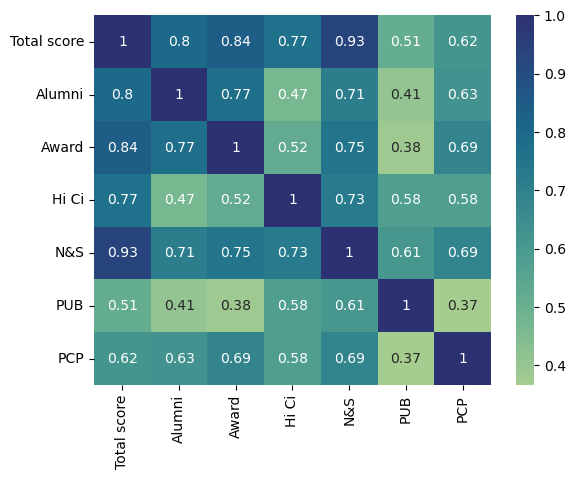

In [33]:
#plotar correlação entre os  fatores considerados usando seaborn
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True,cmap="crest")


In [34]:
##plotar correlação entre os seis fatores considerados usando plotly
fig = px.imshow(correlation,text_auto=True,color_continuous_scale='RdBu_r')
fig.show()

### Construção de rankings baseados em outros fatores

Função para criação de ranking de acordo com um dos seguintes indicadores:
 
 - Alumni
 - Award
 - Hi Ci
 - N&S
 - PUB   
 - PCP

*O valor desses fatores so está disponível para os rankings entre 2005 e 2018

In [35]:
df_2005_2018.columns

Index(['World rank', 'University', 'National rank', 'Total score', 'Alumni',
       'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP', 'Year', 'World rank integer',
       'Country', 'ISO2 CODE', 'ISO3 CODE'],
      dtype='object')

In [36]:
def ranking_fator_selecinado(dados,ano,fator,n_posicoes,overall_ranking='World rank integer',
                             coluna_ano='Year',name_universities='University',location='Country',include_values=False):
    '''
    Função para gerar uma ranking para o fator desejado

    Inputs:
        dados             - Pandas dataframe com os rankings para os anos entre 2005 e 2018
        ano               - (int) ano selecionado para o qual o ranking será criado. Deve ser um ano no intervalo [2005,2018].
        fator             - (str) nome do fator considerado na contrucao do ranking. Fatores aceitos são: 'Alumni',
                                  'Award','Hi Ci','N&S','PUB' e 'PCP'
        n_posicoes        - (int) número de posições no ranking gerado. Serão incluídas desde a posição 1 até n_posicões
        overall_ranking   - (str) nome da coluna do dataframe dados que contem a posição das universidade no ranking geral
        name_universities - (str) nome da coluna do dataframe dados que contem o nome das universidade
        location          - (str) nome da coluna no dataframe com os paises de origem das universidades
        coluna_ano        - (str) nome da coluna com o ano do ranking
        include_values    - (boolean) Se True o dataframe gerado conterá uma coluna com o fator selecionado.Caso False os
                            valores do fator selecionado para cada universidade não serão incluídos
    Output:
        Pandas coluna com três colunas: uma delas com as universidades ordenadas de acordo com o fator selecionado, uma com a 
        posição da universidade no ranking geral e outra com os paises de origem das universidades
    '''
    #if ano not in np.arange(2005,2019,1):
    #    raise Exception('Os rankings estão disponíveis para os anos de 2005 a 2018')

    #if fator not in ['Alumni','Award','Hi Ci','N&S','PUB','PCP']:
    #    raise Exception('Fator selecionador deve ser um dos seguintes: Alumni, Award, Hi Ci , N&S , PUB , PCP')
    dados=dados.loc[dados[coluna_ano]==ano,:] #selecionar o ano
    dados_ordenados=dados.sort_values(by=fator,ascending=False).reset_index(drop=True) #ordenar os valores de acordo com o fator selecionado
    if include_values:
        dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,fator,location]] 
    else:
        dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,location]] 
    dados_ordenados.rename(columns={overall_ranking:'Ranking Geral',location:'Location',name_universities:'Top '+str(n_posicoes)+' '+fator},inplace=True)
    dados_ordenados.index=np.arange(1,n_posicoes+1) #index começando em zero
    return dados_ordenados

In [37]:
#Exemplo: 20 mlehores universidades de acordo com o critério pesquisa e suas posições no ranking geral
ranking_2018_award=ranking_fator_selecinado(df_2005_2018,2018,'Hi Ci',20,include_values=False)
ranking_2018_award

,Ranking Geral,Top 20 Hi Ci,Location
1,1,Harvard University,United States
2,2,Stanford University,United States
3,7,University of Oxford,United Kingdom
4,5,"University of California, Berkeley",United States
5,3,University of Cambridge,United Kingdom
6,26,Duke University,United States
7,11,"University of California, Los Angeles",United States
8,20,Washington University in St. Louis,United States
9,14,University of Washington,United States
10,15,"University of California, San Diego",United States


Função para criação de um dataframe com universidades em cada coluna rankeadas de acordo com os seguintes fatores:

 - Overall
 - Alumni
 - Award
 - Hi Ci
 - N&S
 - PUB   
 - PCP

In [38]:
def ranking_grupo_fatores(dados,ano,n_posicoes,fatores,coluna_names='University',coluna_ano='Year'):
    """
    Função para crição de um dataframe com 6 colunas, em cala uma delas as universidade aparecem rankeadas de acordo com um fator especificado.
        

    Inputs:
        dados        - Pandas dataframe com os rankings para todos os anos entre 2005 e 2018
        ano          - (int) Ano em que o dataframe foi publicado.Deve ser um valor entre 2005 e 2018
        n_posicoes   - (int) Número de posições que aparecerão no ranking
        fatores      - (list) Lista com o nome dos fatores (strings) que serão usados na construção dos rankings
        coluna_names - (str) Nome da coluna com o nome das universidades
        coluna_ano   - (str) Nome da coluna onde estão os anos em que os rankings foram publicados

    Outpout:
        Pandas dataframe no qual em cada coluna as universidades aparecem rankeadas de acordo com um fator
    """
    #nome das colunas do dataframe original que serão usadas para criação dos rankings
    dados_ano_selecionado=dados.loc[dados[coluna_ano]==ano,:] #seleção dos dados para o ano especificado

    #if ano not in np.arange(2005,2019,1):
    #    raise Exception('Os rankings estão disponíveis para os anos de 2005 a 2018')
    
    ranking_fatores=[]
    for num,factor in enumerate(fatores):
        if num==0:
            #o primeiro fator é o ranking geral, ele deve ser ordenado do menor para o maior (do primeiro lugar ao último)
            dados_fator=dados_ano_selecionado.sort_values(by=factor,ascending=True).reset_index(drop=True) #selecionar ano desejado
            dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]] #selecionar o número de posições desejadas
            dados_fator.rename(columns={coluna_names:'Ranking '+'Geral'},inplace=True) #alterar o nome da coluna. Não segue o padrão das
                                                                                #demais em que é só adicionar Ranking ao nome do fator 
        else:
            #nos fatores a ordenação deve ser do maior para o menor (nos fatores os valores são para as pontuações, nas as posições no ranking)
            dados_fator=dados_ano_selecionado.sort_values(by=factor,ascending=False).reset_index(drop=True)
            dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]]
            dados_fator.rename(columns={coluna_names:'Ranking '+fatores[num]},inplace=True)
        ranking_fatores.append(dados_fator)
    ranking_fatores=pd.concat(ranking_fatores,axis=1)
    ranking_fatores.index=np.arange(1,n_posicoes+1)
    
    return ranking_fatores


In [39]:
#Exemplo: Top 20 para o ano de 2018
fatores=['World rank integer','Alumni','Award','Hi Ci','N&S','PUB','PCP']


top_20_2018=ranking_grupo_fatores(df_2005_2018,2018,20,fatores)
top_20_2018

,Ranking Geral,Ranking Alumni,Ranking Award,Ranking Hi Ci,Ranking N&S,Ranking PUB,Ranking PCP
1,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,California Institute of Technology
2,Stanford University,University of Cambridge,Princeton University,Stanford University,Stanford University,University of Toronto,Ecole Normale Superieure - Paris
3,University of Cambridge,Massachusetts Institute of Technology (MIT),University of Cambridge,University of Oxford,Massachusetts Institute of Technology (MIT),University of Michigan-Ann Arbor,Harvard University
4,Massachusetts Institute of Technology (MIT),"University of California, Berkeley",University of Chicago,"University of California, Berkeley","University of California, Berkeley",Shanghai Jiao Tong University,Princeton University
5,"University of California, Berkeley",Columbia University,Stanford University,University of Cambridge,California Institute of Technology,University College London,Massachusetts Institute of Technology (MIT)
6,Princeton University,University of Chicago,Massachusetts Institute of Technology (MIT),Duke University,University of Cambridge,University of Oxford,University of Cambridge
7,University of Oxford,Princeton University,"University of California, Berkeley","University of California, Los Angeles",Columbia University,Stanford University,"University of California, Berkeley"
8,Columbia University,California Institute of Technology,California Institute of Technology,Washington University in St. Louis,Yale University,University of Sao Paulo,Stanford University
9,California Institute of Technology,University of Oxford,Columbia University,University of Washington,"University of California, San Diego",University of Washington,The University of Texas M. D. Anderson Cancer ...
10,University of Chicago,Ecole Normale Superieure - Paris,Rockefeller University,"University of California, San Diego",University of Oxford,Johns Hopkins University,Karolinska Institute


### Análise de dados das universidades que não foram usados na construção dos rankings

Nos dados para o ranking de 2023 estão alguns dados interessantes sobre as universidades que não foram usados na contrução dos rankings, são eles:

- Total_Enrollment
- Total_International_Enrollment
- UG_Enrollment
- International_UG_Enrollment
- PG_Enrollment
- International_PG_Enrollment
- Foundation_year

In [40]:
fatores_extra=['Total_Enrollment','Total_International_Enrollment','UG_Enrollment',
               'International_UG_Enrollment','PG_Enrollment','International_PG_Enrollment','Foundation_year']

In [41]:
#Universidades no top 10
df_2023.loc[:10,['University']+fatores_extra]

,University,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,Foundation_year
0,Harvard University,41987,24.0,14467,10.1,27520,20.1,1636
1,Stanford University,16163,24.0,6994,10.7,9169,34.2,1885
2,Massachusetts Institute of Technology (MIT),11084,16.8,4276,14.5,6808,18.2,1861
3,University of Cambridge,19875,36.9,12265,23.3,7610,58.9,1318
4,"University of California, Berkeley",39874,17.7,29250,19.0,10624,13.9,1868
5,Princeton University,8105,25.1,5260,14.6,2845,44.5,1746
6,University of Oxford,20785,36.4,11900,20.1,8885,58.2,1096
7,Columbia University,33301,37.0,8628,10.1,24673,20.1,1754
8,California Institute of Technology,2240,3.6,901,7.5,1339,1.0,1891
9,University of Chicago,16020,27.5,6797,14.6,9223,37.0,1890


- Criação de duas novas colunas:

    - %UG : Proporção de alunos de graduação dentro do total de alunos na instituição;
    - %PG_Enrollment: Proporção de alunos de pós graduação detro do total de alunos da instituição.

In [42]:
df_2023['%UG']            =df_2023['UG_Enrollment']/df_2023['Total_Enrollment']
df_2023['%PG_Enrollment']=df_2023['PG_Enrollment']/df_2023['Total_Enrollment']


In [43]:
#Criação de dataframe com univerisidades rankeadas de acordo com os fatores especificados

fatores_extra=['Total_Enrollment','Total_International_Enrollment','UG_Enrollment',
               'International_UG_Enrollment','PG_Enrollment','International_PG_Enrollment'] + ['%UG','%PG_Enrollment']
ranking_fatores_extras=ranking_grupo_fatores(df_2023,2023,10,['World rank integer']+fatores_extra)
ranking_fatores_extras

,Ranking Geral,Ranking Total_Enrollment,Ranking Total_International_Enrollment,Ranking UG_Enrollment,Ranking International_UG_Enrollment,Ranking PG_Enrollment,Ranking International_PG_Enrollment,Ranking %UG,Ranking %PG_Enrollment
1,Harvard University,Cairo University,Montpellier Business School,University of Buenos Aires,University of Jena,The University of Melbourne,University of Jena,Rockefeller University,Swarthmore College
2,Stanford University,National Autonomous University of Mexico,Macau University of Science and Technology,Cairo University,Macau University of Science and Technology,Sapienza University of Rome,Macau University of Science and Technology,University of Massachusetts Medical School - W...,Amherst College
3,Massachusetts Institute of Technology (MIT),University of South Africa,London School of Economics and Political Science,National Autonomous University of Mexico,University of Innsbruck,University of Zagreb,The University of Sheffield,Icahn School of Medicine at Mount Sinai,Gwangju Institute of Science and Technology
4,University of Cambridge,Alexandria University,Swiss Federal Institute of Technology Lausanne,The Open University,Università Della Svizzera Italiana,Tsinghua University,London School of Economics and Political Science,Medical College of Wisconsin,Lincoln University
5,"University of California, Berkeley",Ain Shams University,Università Della Svizzera Italiana,University of Toronto,London School of Economics and Political Science,Charles University in Prague,London Business School,Baylor College of Medicine,Medical University of Innsbruck
6,Princeton University,National Polytechnic Institute,Maastricht University,Texas A&M University,Imperial College London,Université Paris Cité,Monash University,University of Buenos Aires,Pohang University of Science and Technology
7,University of Oxford,Zagazig University,Monash University,Metropolitan Autonomous University,University College London,Aix Marseille University,University of Southampton,Gwangju Institute of Science and Technology,Medical University of Graz
8,Columbia University,Mansoura University,University of Innsbruck,Zhengzhou University,Monash University,Jilin University,University of the Sunshine Coast,Lincoln University,Montpellier Business School
9,California Institute of Technology,University of Toronto,University of Luxembourg,University of Sao Paulo,University of St Andrews,New York University,Charles Darwin University,The University of Texas Southwestern Medical C...,Ulsan National Institute of Science and Techno...
10,University of Chicago,Sapienza University of Rome,Carnegie Mellon University,University of Central Florida,University of Toronto,Zhejiang University,Carnegie Mellon University,Medical University of Innsbruck,Indian Institute of Science


#### Total_Enrollment


In [44]:
top_total_alunos=ranking_fator_selecinado(df_2023,2023,'Total_Enrollment',10,include_values=True)
top_total_alunos

,Ranking Geral,Top 10 Total_Enrollment,Total_Enrollment,Location
1,307,Cairo University,221036,Egypt
2,256,National Autonomous University of Mexico,197407,Mexico
3,991,University of South Africa,193874,South Africa
4,603,Alexandria University,182129,Egypt
5,602,Ain Shams University,179636,Egypt
6,646,National Polytechnic Institute,177983,Mexico
7,900,Zagazig University,156419,Egypt
8,641,Mansoura University,140126,Egypt
9,24,University of Toronto,81015,Canada
10,119,Sapienza University of Rome,77390,Italy


#### Total_International_Enrollment	

In [45]:
# Universidades com maiores proporções de alunos estrangeiros
top_alunos_estrangeiros=ranking_fator_selecinado(df_2023,2023,'Total_International_Enrollment',10,include_values=True)
top_alunos_estrangeiros

,Ranking Geral,Top 10 Total_International_Enrollment,Total_International_Enrollment,Location
1,944,Montpellier Business School,1000.0,France
2,428,Macau University of Science and Technology,91.1,China-Macau
3,163,London School of Economics and Political Science,68.4,United Kingdom
4,54,Swiss Federal Institute of Technology Lausanne,59.0,Switzerland
5,564,Università Della Svizzera Italiana,58.0,Switzerland
6,226,Maastricht University,54.0,Netherlands
7,77,Monash University,53.6,Australia
8,373,University of Innsbruck,50.5,Austria
9,684,University of Luxembourg,49.0,Luxembourg
10,104,Carnegie Mellon University,47.4,United States


Não parece existir relação entre a proporção de alunos estrangeiros e a posição oucupada pela universidade no ranking, comforme pode ser visualizado no scatterplot abaixo.

<Axes: xlabel='World rank integer', ylabel='Total_International_Enrollment'>

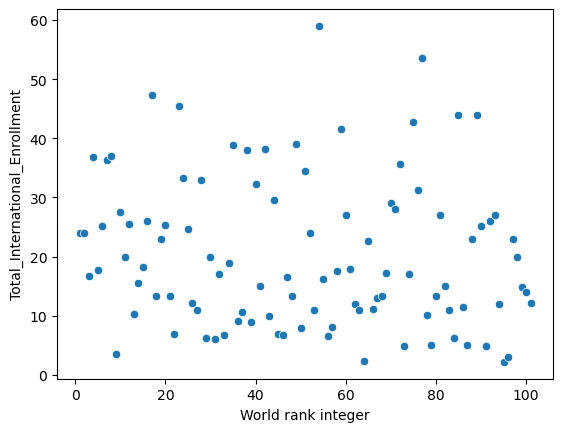

In [46]:
sns.scatterplot(data=df_2023.loc[:100,:],x='World rank integer',y='Total_International_Enrollment')

#### UG_Enrollment

In [47]:
#Universidade com as maiores quantidade de alunos de graduação
top_alunos_graduacao=ranking_fator_selecinado(df_2023,2023,'UG_Enrollment',10,include_values=True)
top_alunos_graduacao

,Ranking Geral,Top 10 UG_Enrollment,UG_Enrollment,Location
1,264,University of Buenos Aires,320000,Argentina
2,307,Cairo University,208338,Egypt
3,256,National Autonomous University of Mexico,171916,Mexico
4,762,The Open University,60405,United Kingdom
5,24,University of Toronto,58422,Canada
6,173,Texas A&M University,56527,United States
7,942,Metropolitan Autonomous University,56038,Mexico
8,200,Zhengzhou University,54087,China
9,145,University of Sao Paulo,53647,Brazil
10,366,University of Central Florida,52422,United States


#### International_UG_Enrollment

In [48]:
#Universidade com as maiores propoções de alunos estrangeiros na graduação
top_alunos_estrangeiros_graduacao=ranking_fator_selecinado(df_2023,2023,'International_UG_Enrollment',10,include_values=True)
top_alunos_estrangeiros_graduacao

,Ranking Geral,Top 10 International_UG_Enrollment,International_UG_Enrollment,Location
1,470,University of Jena,367.0,Germany
2,428,Macau University of Science and Technology,91.2,China-Macau
3,373,University of Innsbruck,71.5,Austria
4,564,Università Della Svizzera Italiana,57.0,Switzerland
5,163,London School of Economics and Political Science,53.1,United Kingdom
6,23,Imperial College London,49.3,United Kingdom
7,17,University College London,45.1,United Kingdom
8,77,Monash University,45.0,Australia
9,386,University of St Andrews,40.2,United Kingdom
10,24,University of Toronto,39.8,Canada


#### PG_Enrollment

In [49]:
#Universidades com os maiores números de alunos na pós graduação
top_alunos_posgraduacao=ranking_fator_selecinado(df_2023,2023,'PG_Enrollment',10,include_values=True)
top_alunos_posgraduacao

,Ranking Geral,Top 10 PG_Enrollment,PG_Enrollment,Location
1,35,The University of Melbourne,37009,Australia
2,119,Sapienza University of Rome,36573,Italy
3,491,University of Zagreb,33889,Croatia
4,22,Tsinghua University,32298,China
5,308,Charles University in Prague,30960,Czech Republic
6,69,Université Paris Cité,29901,France
7,151,Aix Marseille University,29507,France
8,108,Jilin University,29146,China
9,28,New York University,28189,United States
10,33,Zhejiang University,28048,China


#### International_PG_Enrollment

In [50]:
#Universidades com as maiores proporções de alunos estrangeiros na pós graduação
top_alunos_estrangeiros_posgraduacao=ranking_fator_selecinado(df_2023,2023,'International_PG_Enrollment',10,include_values=True)
top_alunos_estrangeiros_posgraduacao

,Ranking Geral,Top 10 International_PG_Enrollment,International_PG_Enrollment,Location
1,470,University of Jena,1342.0,Germany
2,428,Macau University of Science and Technology,90.8,China-Macau
3,176,The University of Sheffield,87.7,United Kingdom
4,163,London School of Economics and Political Science,81.0,United Kingdom
5,938,London Business School,80.6,United Kingdom
6,77,Monash University,74.4,Australia
7,193,University of Southampton,73.3,United Kingdom
8,791,University of the Sunshine Coast,68.7,Australia
9,613,Charles Darwin University,67.1,Australia
10,104,Carnegie Mellon University,66.6,United States


### %UG


Proporção de alunos de graduação dentre o total de alunos

In [51]:
#Universidades com as maiores proporções de alunos de graduação dentre o total de alunos
top_proporcao_graduacao=ranking_fator_selecinado(df_2023,2023,'%UG',10,include_values=True)
top_proporcao_graduacao

,Ranking Geral,Top 10 %UG,%UG,Location
1,40,Rockefeller University,78.875000,United States
2,255,University of Massachusetts Medical School - W...,15.942135,United States
3,113,Icahn School of Medicine at Mount Sinai,15.749597,United States
4,734,Medical College of Wisconsin,12.388220,United States
5,152,Baylor College of Medicine,11.869539,United States
6,264,University of Buenos Aires,11.847464,Argentina
7,826,Gwangju Institute of Science and Technology,9.323642,South Korea
8,841,Lincoln University,7.900242,New Zealand
9,48,The University of Texas Southwestern Medical C...,7.780827,United States
10,530,Medical University of Innsbruck,6.595078,Austria


#### %PG_Enrollment

In [52]:
df_2023.sort_values(by='%PG_Enrollment',ascending=False).head()

,World rank,University,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude,World rank integer,Year,%UG,%PG_Enrollment
964,901-1000,Swarthmore College,United States,North America,1864,"Swarthmore, Pennsylvania, United States",NaN,1660,13.3,1660,10.1,7793,20.1,39.903603,-75.353737,965,2023,1.000000,4.694578
803,801-900,Amherst College,United States,North America,1821,"Amherst, Massachusetts, United States",NaN,1946,13.3,1946,10.1,7793,20.1,42.370377,-72.516069,804,2023,1.000000,4.004625
825,801-900,Gwangju Institute of Science and Technology,South Korea,Asia,1993,"123 Cheomdan-gwagiro (Oryong-dong), Buk-gu, G...",NaN,2098,6.0,19561,10.1,7793,20.1,35.228156,126.842166,826,2023,9.323642,3.714490
840,801-900,Lincoln University,New Zealand,Oceania,1990,Springs Road,Lincoln University is New Zealand’s specialist...,2476,39.0,19561,10.1,7793,20.1,39.806552,-75.928706,841,2023,7.900242,3.147415
529,501-600,Medical University of Innsbruck,Austria,Europe,2004,"Medizinische University Innsbruck, Christoph-...",NaN,2966,44.0,19561,10.1,7793,20.1,NaN,NaN,530,2023,6.595078,2.627444


In [53]:
#Universidades com as maiores proporções de alunos de pós-graduação dentre o total de alunos
top_proporcao_posgraduacao=ranking_fator_selecinado(df_2023,2023,'%PG_Enrollment',10,include_values=True)
top_proporcao_posgraduacao

,Ranking Geral,Top 10 %PG_Enrollment,%PG_Enrollment,Location
1,965,Swarthmore College,4.694578,United States
2,804,Amherst College,4.004625,United States
3,826,Gwangju Institute of Science and Technology,3.714490,South Korea
4,841,Lincoln University,3.147415,New Zealand
5,530,Medical University of Innsbruck,2.627444,Austria
6,346,Pohang University of Science and Technology,2.423950,South Korea
7,643,Medical University of Graz,2.324881,Austria
8,944,Montpellier Business School,2.106216,France
9,254,Ulsan National Institute of Science and Techno...,1.888297,South Korea
10,323,Indian Institute of Science,1.887839,India


In [54]:
df_2023.columns

Index(['World rank', 'University', 'Country', 'Region', 'Foundation_year',
       'Address', 'Intro', 'Total_Enrollment',
       'Total_International_Enrollment', 'UG_Enrollment',
       'International_UG_Enrollment', 'PG_Enrollment',
       'International_PG_Enrollment', 'latitude', 'longitude',
       'World rank integer', 'Year', '%UG', '%PG_Enrollment'],
      dtype='object')

## Universidades Brasileiras

In [55]:
#dataframe somente com as universidades brasileiras
df_universidades_brasileiras=df_rankings[df_rankings["Country"]=="Brazil"].loc[:,['University','Year','World rank integer']].sort_values(by=["Year",'World rank integer'])
df_universidades_brasileiras.reset_index(drop=True,inplace=True)
df_universidades_brasileiras

,University,Year,World rank integer
0,University of Sao Paulo,2005,101
1,State University of Campinas,2005,203
2,Federal University of Rio de Janeiro,2005,301
3,Sao Paulo State University,2005,401
4,University of Sao Paulo,2006,102
...,...,...,...
115,Fluminense Federal University,2023,819
116,Federal University of Ceara,2023,917
117,Federal University of Goiás,2023,918
118,Federal University of Pernambuco,2023,919


### Número de universidades brasileiras nos rankings de cada ano

In [56]:
#Número de universidades brasileiras que entraram no ranking
#Dataframe com o número total de universidades no ranking de cada ano e quantas dessas são brasileiras
num_brasileiras={'Ano':[],
                'Total Universidades':[],
                'Universidades Brasileiras':[]}
for ano in df_rankings["Year"].unique():
    num_brasileiras['Ano']+=[ano]
    num_brasileiras['Total Universidades']+=[len(df_rankings[df_rankings['Year']==ano])]
    try:
        num_brasileiras['Universidades Brasileiras']+=[len(df_universidades_brasileiras[df_universidades_brasileiras['Year']==ano])]
    except:
        num_brasileiras['Universidades Brasileiras']+=[0]

num_brasileiras=pd.DataFrame.from_dict(num_brasileiras)
num_brasileiras

                

,Ano,Total Universidades,Universidades Brasileiras
0,2009,508,6
1,2010,508,6
2,2011,507,7
3,2014,507,6
4,2015,507,6
5,2012,507,6
6,2016,506,6
7,2018,504,6
8,2013,505,6
9,2017,503,6


### Universidades brasileiras melhores colocadas

In [57]:
#Nenhuma universidade brasileiras
df_universidades_brasileiras[df_universidades_brasileiras['World rank integer']<=100]

,University,Year,World rank integer


In [58]:
#Universidade brasileiras entre as 200 melhores
df_universidades_brasileiras[df_universidades_brasileiras['World rank integer']<=200]

,University,Year,World rank integer
0,University of Sao Paulo,2005,101
4,University of Sao Paulo,2006,102
8,University of Sao Paulo,2007,102
13,University of Sao Paulo,2008,101
19,University of Sao Paulo,2009,101
25,University of Sao Paulo,2010,101
31,University of Sao Paulo,2011,102
38,University of Sao Paulo,2012,101
44,University of Sao Paulo,2013,101
50,University of Sao Paulo,2014,101


In [59]:
#Universidade brasileiras entre as 300 melhores
df_universidades_brasileiras[df_universidades_brasileiras['World rank integer']<=300]

,University,Year,World rank integer
0,University of Sao Paulo,2005,101
1,State University of Campinas,2005,203
4,University of Sao Paulo,2006,102
8,University of Sao Paulo,2007,102
9,State University of Campinas,2007,203
13,University of Sao Paulo,2008,101
14,State University of Campinas,2008,201
19,University of Sao Paulo,2009,101
20,State University of Campinas,2009,201
25,University of Sao Paulo,2010,101


In [60]:
#Criação de dataframe com as 3 universidades brasileiras melhores colocadas em cada ranking
top_3_brasileiras={}
for ano in df_universidades_brasileiras["Year"].unique():
    top_3_brasileiras[str(ano)]=df_universidades_brasileiras[df_universidades_brasileiras['Year']==ano].iloc[:3,0].reset_index(drop=True)

In [61]:
top_3_brasileiras=pd.DataFrame.from_dict(top_3_brasileiras)
top_3_brasileiras.index=[1,2,3]
top_3_brasileiras

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2023
1,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo
2,State University of Campinas,Federal University of Rio de Janeiro,State University of Campinas,State University of Campinas,State University of Campinas,State University of Campinas,State University of Campinas,State University of Campinas,Sao Paulo State University,University of Campinas,University of Campinas,UNESP,UNESP,University of Campinas,UNESP,UNESP
3,Federal University of Rio de Janeiro,State University of Campinas,Federal University of Rio de Janeiro,Federal University of Minas Gerais,Federal University of Rio de Janeiro,Sao Paulo State University,Federal University of Rio de Janeiro,Sao Paulo State University,Federal University of Rio de Janeiro,Federal University of Minas Gerais,Federal University of Rio de Janeiro,Federal University of Rio de Janeiro,Federal University of Rio de Janeiro,Federal University of Rio de Janeiro,University of Campinas,Federal University of Minas Gerais


In [87]:
#A Unicamp aparece com dois nomes diferentes nos rankings: State University of Campinas e University of Campinas

df_rankings['University']=df_rankings['University'].replace('State University of Campinas','University of Campinas')

### USP e Unicamp

#### Comparativo com as 10 melhores colocadas


In [88]:
colunas_comparativo=['University','Country','World rank integer','Alumni', 'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP'] #colunas_comparativo são as colunas que serão usadas no comparativo
ranking_2018=df_rankings.loc[df_rankings["Year"]==2018,colunas_comparativo] #somente o ranking de 2018
filtro=((ranking_2018['University']=='University of Sao Paulo') | (ranking_2018['University']=='University of Campinas')) #filtro para selecionar somente USP e Unicamp
usp_unicamp=ranking_2018.loc[filtro,:] #dados para usp e unicamp
top10_2018=ranking_2018.sort_values(by='World rank integer').iloc[:9,:]



In [89]:
#Universidades no top 10 no ano de 2018
top10_2018

,University,Country,World rank integer,Alumni,Award,Hi Ci,N&S,PUB,PCP
5965,Harvard University,United States,1,100.0,100.0,100.0,100.0,100.0,79.6
3995,Stanford University,United States,2,44.5,88.5,76.6,78.6,76.5,56.0
5002,University of Cambridge,United Kingdom,3,82.3,95.4,56.7,57.6,70.9,59.5
6310,Massachusetts Institute of Technology (MIT),United States,4,70.9,83.6,52.5,71.4,64.4,70.3
79,"University of California, Berkeley",United States,5,65.6,78.4,61.3,67.8,65.1,58.2
3144,Princeton University,United States,6,55.8,97.9,44.9,47.1,44.2,73.3
3145,University of Oxford,United Kingdom,7,50.8,54.2,61.3,52.6,77.1,46.8
3301,Columbia University,United States,8,62.8,67.2,41.8,56.4,71.5,33.7
5421,California Institute of Technology,United States,9,53.5,67.5,34.5,57.6,45.0,100.0


In [90]:
#dados para Usp e Unicamp para 2024
usp_unicamp

,University,Country,World rank integer,Alumni,Award,Hi Ci,N&S,PUB,PCP
2540,University of Campinas,Brazil,301,0.0,0.0,0.0,5.7,45.2,22.3
7065,University of Sao Paulo,Brazil,151,0.0,0.0,0.0,14.2,76.2,17.1


In [91]:
#Criação deum dataframe com os valores de certos indicadores para Usp e Unicamp bem como dos valores máximos, mínimos, média e mediana desses mesmos indicadores para as universidades
#no top 10
comparativo_usp_unicamp_top10={'Alumni':[],'Award':[],'Hi Ci':[], #Dicionário que será convertido em dataframe com os indicadores selecionados
            'N&S':[],'PUB':[],'PCP':[]}
for key in comparativo_usp_unicamp_top10.keys():
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['University']=='University of Sao Paulo',key].item()] #dados para usp
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['University']=='University of Campinas',key].item()]  #dados para unicamp
    comparativo_usp_unicamp_top10[key]+=[top10_2018.loc[:,key].max().item()] #maximo dentre universidades no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2018.loc[:,key].min().item()] #mínimo dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2018.loc[:,key].mean().item()] #média dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2018.loc[:,key].median().item()] #mediana dentre universidades no top 10

comparativo_usp_unicamp_top10=pd.DataFrame.from_dict(comparativo_usp_unicamp_top10)
index_comparativo=['USP','Unicamp','Máximo Top 10','Mínimo Top 10', 'Média Top 10', 'Mediana Top 10'] #nome do index
comparativo_usp_unicamp_top10.index=index_comparativo
comparativo_usp_unicamp_top10

,Alumni,Award,Hi Ci,N&S,PUB,PCP
USP,0.000000,0.000000,0.000000,14.200000,76.2,17.100000
Unicamp,0.000000,0.000000,0.000000,5.700000,45.2,22.300000
Máximo Top 10,100.000000,100.000000,100.000000,100.000000,100.0,100.000000
Mínimo Top 10,44.500000,54.200000,34.500000,47.100000,44.2,33.700000
Média Top 10,65.133333,81.411111,58.844444,65.455556,68.3,64.155556
Mediana Top 10,62.800000,83.600000,56.700000,57.600000,70.9,59.500000


#### Evolução de indicadores da USP e da Unicamp


In [92]:
#Indicadores que serão analisados
indicadores=['Year','Alumni', 'Award',
                     'Hi Ci', 'N&S', 'PUB', 'PCP'] #colunas_comparativo são as colunas que serão usadas no comparativo


In [93]:
#criação de um dataframe com os dados da unicamp
unicamp=df_rankings[(df_rankings['University']=='University of Campinas') & (df_rankings['Year']<=2018)].loc[:,indicadores].reset_index(drop=True).sort_values(by='Year')
unicamp

,Year,Alumni,Award,Hi Ci,N&S,PUB,PCP
4,2005,0.0,0.0,7.9,6.2,40.6,17.8
11,2006,0.0,0.0,7.7,4.1,41.0,19.1
10,2007,0.0,0.0,7.4,4.1,42.0,19.3
5,2008,0.0,0.0,7.3,6.3,41.8,14.3
8,2009,0.0,0.0,7.3,6.9,41.2,19.5
9,2010,0.0,0.0,7.2,7.8,44.3,19.9
12,2011,0.0,0.0,7.2,7.9,43.1,20.5
13,2012,0.0,0.0,7.2,8.0,42.0,18.7
7,2013,0.0,0.0,7.2,5.4,42.4,19.9
0,2014,0.0,0.0,3.6,4.6,42.6,20.0


In [95]:
#criação de um dataframe com os dados da usp

usp=unicamp=df_rankings[(df_rankings['University']=='University of Sao Paulo') & (df_rankings['Year']<=2018)].loc[:,indicadores].reset_index(drop=True).sort_values(by='Year')
usp

,Year,Alumni,Award,Hi Ci,N&S,PUB,PCP
3,2005,0.0,0.0,11.1,11.0,63.5,27.8
12,2006,0.0,0.0,10.9,11.5,64.2,30.2
8,2007,0.0,0.0,10.5,13.1,65.3,30.4
9,2008,0.0,0.0,10.3,12.7,69.0,32.7
5,2009,0.0,0.0,10.3,12.6,69.3,32.7
11,2010,0.0,0.0,10.2,13.3,76.3,15.4
0,2011,0.0,0.0,10.2,12.5,73.7,14.6
10,2012,0.0,0.0,10.2,10.8,72.8,14.9
7,2013,0.0,0.0,10.2,11.6,72.7,14.7
6,2014,0.0,0.0,12.2,12.0,72.9,15.4


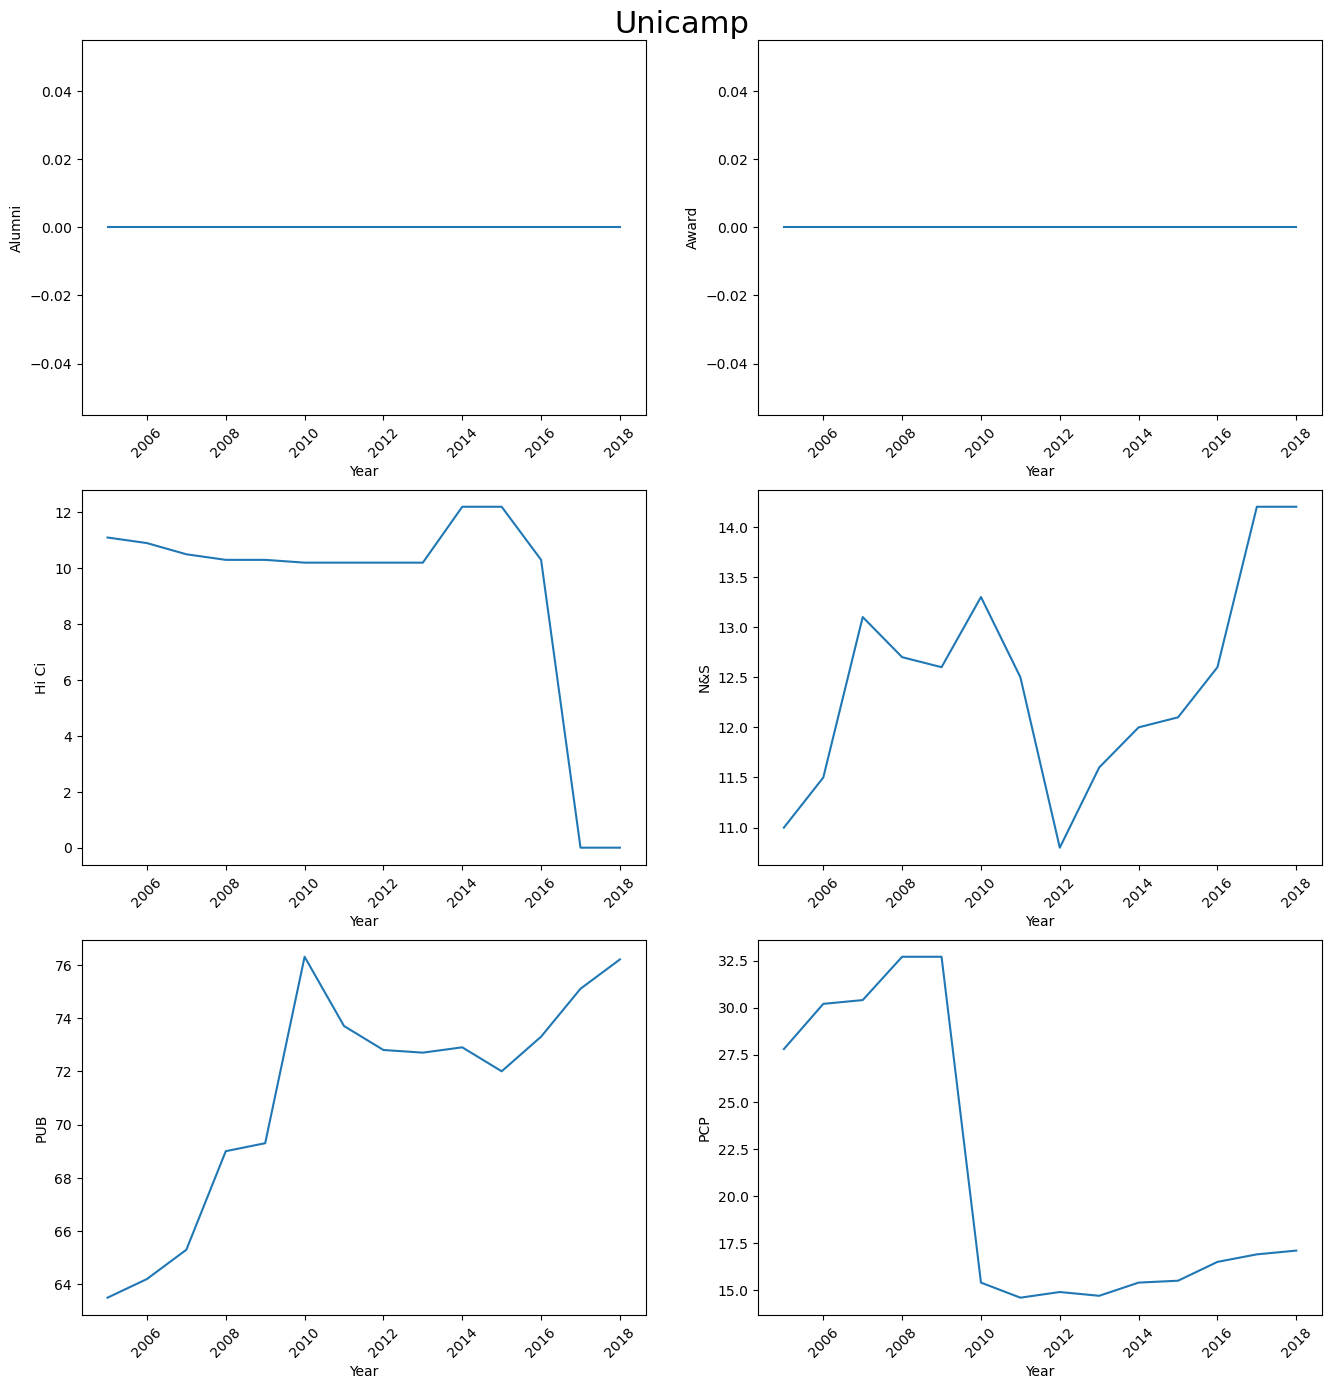

In [98]:
ncols=2
nrows=3
index_indicador=1
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('Unicamp', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        sns.lineplot(data=unicamp,x='Year',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
#axs[3,0].tick_params('x', labelrotation=45) 


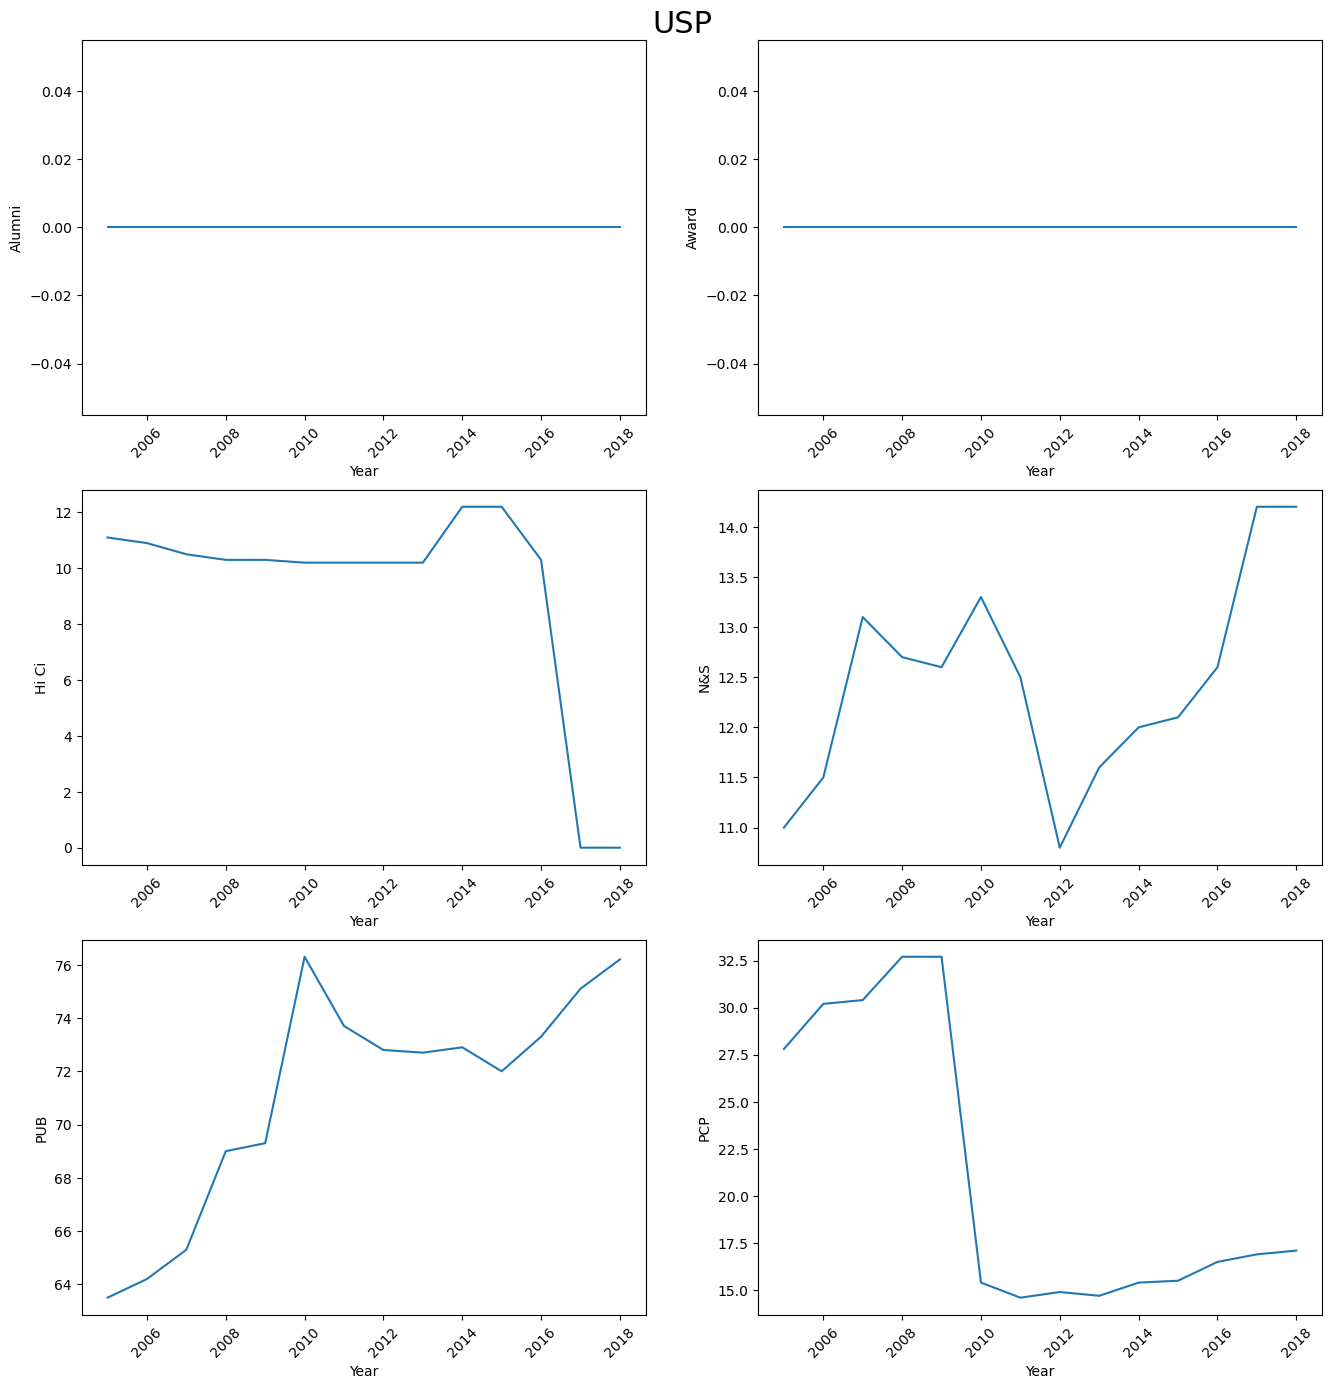

In [99]:
ncols=2
nrows=3
index_indicador=1
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('USP', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        sns.lineplot(data=usp,x='Year',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
#axs[3,0].tick_params('x', labelrotation=45) 

In [ ]:
#Plotar graficos com as proporções das avaliações para cada destino
fig,axs=plt.subplots(8,2,figsize=(22,40))
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos
fig.suptitle('Proporção das avaliações com cada nota', fontsize=22) #adiciona um título geral para os subplots
row_subplot=0
col_subplot=0
for num_destino in range(len(proporcao_notas)):
    destino=proporcao_notas.index[num_destino]
    sns.set_theme(style='darkgrid')
    ax=sns.barplot(x=[1,2,3,4,5],y=proporcao_notas.iloc[num_destino,:5],ax=axs[row_subplot,col_subplot],color='steelblue')
    ax.text(-0.45, 0.95, destino)
    ax.text(-0.45, 0.85, "Número de avaliações: {}".format(proporcao_notas.loc[destino,'Total Avaliações']))
    ax.set(ylabel=None)
    ax.set_ylim(0,1)
    row_subplot+=1
    if row_subplot>7:
        row_subplot=0
        col_subplot=1
fig.delaxes(axs[7][1])
